In [652]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
import datetime
import sklearn as sk
from sklearn.linear_model import LinearRegression

In [653]:
# membaca file dan ubah tanggal menjadi time series
df = pd.read_csv("sulawesiutara.csv")
df['Tanggal'] = pd.to_datetime(df.Tanggal)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Tanggal  365 non-null    datetime64[ns]
 1   Tn       364 non-null    float64       
 2   Tx       363 non-null    float64       
 3   Tavg     356 non-null    float64       
 4   RH_avg   356 non-null    float64       
 5   RR       354 non-null    float64       
 6   ss       363 non-null    float64       
 7   ff_x     364 non-null    float64       
 8   ddd_x    364 non-null    float64       
 9   ff_avg   364 non-null    float64       
 10  ddd_car  364 non-null    object        
dtypes: datetime64[ns](1), float64(9), object(1)
memory usage: 31.5+ KB


<ipython-input-653-52838c407677>:3: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Tanggal'] = pd.to_datetime(df.Tanggal)


In [654]:
#ambil data tanggal, tn (temperatur minimum), tx(temperatur maksimum), RR(curah hujan), Tavg(tempeartur rata rata)
df1 = df[["Tanggal", "Tn","Tx","RR", "Tavg"]]
df1

,Tanggal,Tn,Tx,RR,Tavg
0,2023-01-01,22.9,31.6,0.0,27.9
1,2023-02-01,24.5,31.8,0.0,27.7
2,2023-03-01,23.2,31.2,5.0,26.7
3,2023-04-01,22.5,29.9,3.5,27.0
4,2023-05-01,23.9,32.2,9.2,27.8
...,...,...,...,...,...
360,2023-12-16,23.8,31.4,0.0,27.2
361,2023-12-17,24.7,30.8,3.9,27.3
362,2023-12-18,23.4,33.0,0.0,28.6
363,2023-12-19,24.6,31.7,0.0,27.2


In [655]:
# cek duplikat
df1.duplicated('Tanggal', keep=False).sum()

22

In [656]:
# hapus duplikat
df1 = df1.drop_duplicates('Tanggal', keep='first').reset_index()
df1.duplicated().sum()

0

In [657]:
# ganti kode 8888 menjadi 0.0
df1 = df1.replace(8888, 0.0)
df1.loc[df1['RR']==8888].count()

index      0
Tanggal    0
Tn         0
Tx         0
RR         0
Tavg       0
dtype: int64

In [658]:
# sort berdasarkan tanggal
df1 = df1.sort_values(by=["Tanggal"]).reset_index()
df1

,level_0,index,Tanggal,Tn,Tx,RR,Tavg
0,0,0,2023-01-01,22.9,31.6,0.0,27.9
1,31,31,2023-01-02,23.4,30.0,15.5,NaN
2,59,60,2023-01-03,21.3,31.9,0.0,27.2
3,90,92,2023-01-04,24.0,31.2,26.2,27.1
4,120,123,2023-01-05,24.4,31.8,5.4,27.6
...,...,...,...,...,...,...,...
349,349,360,2023-12-16,23.8,31.4,0.0,27.2
350,350,361,2023-12-17,24.7,30.8,3.9,27.3
351,351,362,2023-12-18,23.4,33.0,0.0,28.6
352,352,363,2023-12-19,24.6,31.7,0.0,27.2


In [659]:
#cek null
df1.isnull().sum()

level_0     0
index       0
Tanggal     0
Tn          1
Tx          2
RR         10
Tavg        8
dtype: int64

In [660]:
# isi yang null
mrr = df1['RR'].mean()
tnn = df1['Tn'].mean()
txx = df1['Tx'].mean()
mav = (df1['Tn'] + df1['Tx'])/2

df1['RR'] = df1['RR'].fillna(mrr)
df1['Tn'] = df1['Tn'].fillna(tnn)
df1['Tx'] = df1['Tx'].fillna(txx)
df1['Tavg'] = df1['Tavg'].fillna(mav)

df1.isnull().sum()

level_0    0
index      0
Tanggal    0
Tn         0
Tx         0
RR         0
Tavg       2
dtype: int64

In [661]:
ma = df1['Tavg'].mean()
df1['Tavg'] = df1['Tavg'].fillna(ma)
df1.isnull().sum()

level_0    0
index      0
Tanggal    0
Tn         0
Tx         0
RR         0
Tavg       0
dtype: int64

<Axes: >

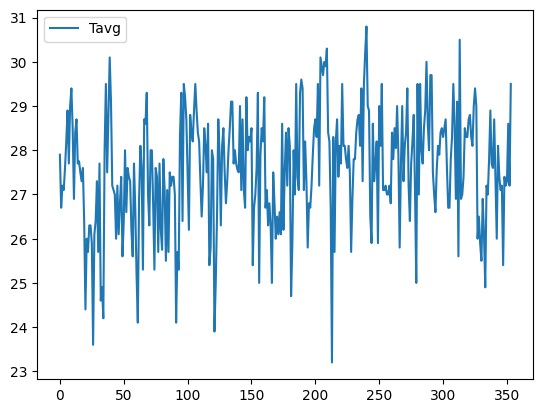

In [662]:
#plotting tavg
df1[['Tavg']].plot()

<Axes: >

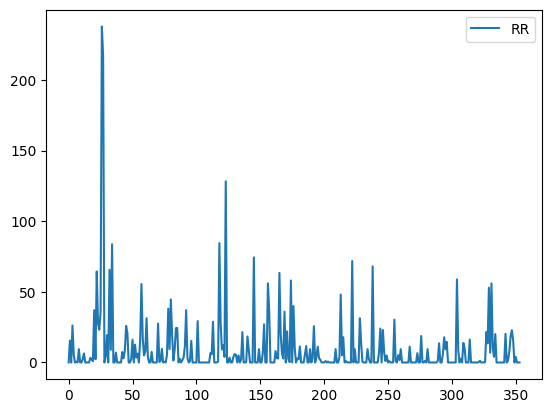

In [663]:
#plotting tavg
df1[['RR']].plot()

In [664]:
#shifting tx, tavg, dan rr
df1['ptx'] = df1.shift(-1)["Tx"]
df1['pta'] = df1.shift(-1)["Tavg"]
df1['ptr'] = df1.shift(-1)["RR"]
df1

,level_0,index,Tanggal,Tn,Tx,RR,Tavg,ptx,pta,ptr
0,0,0,2023-01-01,22.9,31.6,0.0,27.9,30.0,26.7,15.5
1,31,31,2023-01-02,23.4,30.0,15.5,26.7,31.9,27.2,0.0
2,59,60,2023-01-03,21.3,31.9,0.0,27.2,31.2,27.1,26.2
3,90,92,2023-01-04,24.0,31.2,26.2,27.1,31.8,27.6,5.4
4,120,123,2023-01-05,24.4,31.8,5.4,27.6,33.4,28.2,0.0
...,...,...,...,...,...,...,...,...,...,...
349,349,360,2023-12-16,23.8,31.4,0.0,27.2,30.8,27.3,3.9
350,350,361,2023-12-17,24.7,30.8,3.9,27.3,33.0,28.6,0.0
351,351,362,2023-12-18,23.4,33.0,0.0,28.6,31.7,27.2,0.0
352,352,363,2023-12-19,24.6,31.7,0.0,27.2,32.5,29.5,0.0


In [665]:
# ambil data RR, tavg, pta, ptr
df1 = df1[['RR', 'Tavg', 'pta', 'ptr']]
df1

,RR,Tavg,pta,ptr
0,0.0,27.9,26.7,15.5
1,15.5,26.7,27.2,0.0
2,0.0,27.2,27.1,26.2
3,26.2,27.1,27.6,5.4
4,5.4,27.6,28.2,0.0
...,...,...,...,...
349,0.0,27.2,27.3,3.9
350,3.9,27.3,28.6,0.0
351,0.0,28.6,27.2,0.0
352,0.0,27.2,29.5,0.0


In [666]:
#hapus yang kosong
df1 = df1.iloc[:-1, :].copy()
df1

,RR,Tavg,pta,ptr
0,0.0,27.9,26.7,15.5
1,15.5,26.7,27.2,0.0
2,0.0,27.2,27.1,26.2
3,26.2,27.1,27.6,5.4
4,5.4,27.6,28.2,0.0
...,...,...,...,...
348,15.6,27.4,27.2,0.0
349,0.0,27.2,27.3,3.9
350,3.9,27.3,28.6,0.0
351,0.0,28.6,27.2,0.0


In [667]:
#import library
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [668]:
#buat indeks
df1['Indeks'] = df1.reset_index().index
df1

,RR,Tavg,pta,ptr,Indeks
0,0.0,27.9,26.7,15.5,0
1,15.5,26.7,27.2,0.0,1
2,0.0,27.2,27.1,26.2,2
3,26.2,27.1,27.6,5.4,3
4,5.4,27.6,28.2,0.0,4
...,...,...,...,...,...
348,15.6,27.4,27.2,0.0,348
349,0.0,27.2,27.3,3.9,349
350,3.9,27.3,28.6,0.0,350
351,0.0,28.6,27.2,0.0,351


In [669]:
#data training dan testing
X = df1[["Indeks", "Tavg"]]
y = df1["pta"]

In [670]:
#data spliting
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size = 0.2, random_state=0, shuffle = False)


In [671]:
#data fitting
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [672]:
X_test

,Indeks,Tavg
282,282,29.5
283,283,28.0
284,284,27.7
285,285,28.5
286,286,28.9
...,...,...
348,348,27.4
349,349,27.2
350,350,27.3
351,351,28.6


In [673]:
#testing
pred1 = lr.predict(X_test)
pred1

array([28.55294605, 28.05544083, 27.95811253, 28.22761306, 28.3637213 ,
       28.73326606, 28.26910892, 28.07173639, 28.64136961, 28.64408554,
       27.91314379, 27.74911933, 27.61844296, 27.94151831, 28.12409595,
       28.06011573, 28.22957203, 28.26563604, 28.20165581, 28.27106789,
       28.34047997, 27.97636706, 27.6789503 , 27.68166622, 28.05121099,
       28.2206673 , 28.62356014, 28.32614338, 27.76194201, 28.49831561,
       27.33384887, 28.97062053, 27.77280572, 27.80886972, 27.94497795,
       28.31452271, 28.25054249, 28.25325841, 28.38936665, 28.42543065,
       28.26140619, 28.19742597, 28.50027458, 28.63638281, 28.50570643,
       27.50798007, 27.67743638, 27.48006385, 27.34938747, 27.81897647,
       27.55490778, 27.1574468 , 27.92716848, 27.86318825, 28.13268879,
       28.50223355, 28.10477256, 28.07414041, 28.44368518, 28.01287611,
       27.54871897, 28.2517445 , 28.02102389, 27.92369559, 27.95975959,
       27.36221015, 28.0318876 , 27.96790737, 28.00397138, 28.44

In [674]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
mae = mean_absolute_error(y_test, pred1)
mse = mean_squared_error(y_test, pred1)
print(mae, mse)

0.8708755892110636 1.3091928748274873


In [675]:
X_test['Indeks'] = X_test.index
X_test

,Indeks,Tavg
282,282,29.5
283,283,28.0
284,284,27.7
285,285,28.5
286,286,28.9
...,...,...
348,348,27.4
349,349,27.2
350,350,27.3
351,351,28.6


In [676]:
predd = pd.DataFrame(pred1).set_index(X_test['Indeks'])
predd

,0
Indeks,
282,28.552946
283,28.055441
284,27.958113
285,28.227613
286,28.363721
...,...
348,28.031888
349,27.967907
350,28.003971


In [677]:
kan = pd.concat([df1['Tavg'], predd], axis=1)
kan.sort_index(False).head(1000)

<ipython-input-677-a78c5f2a57f4>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.sort_index will be keyword-only.
  kan.sort_index(False).head(1000)


,Tavg,0
0,27.9,NaN
1,26.7,NaN
2,27.2,NaN
3,27.1,NaN
4,27.6,NaN
...,...,...
348,27.4,28.031888
349,27.2,27.967907
350,27.3,28.003971
351,28.6,28.440212


<Axes: >

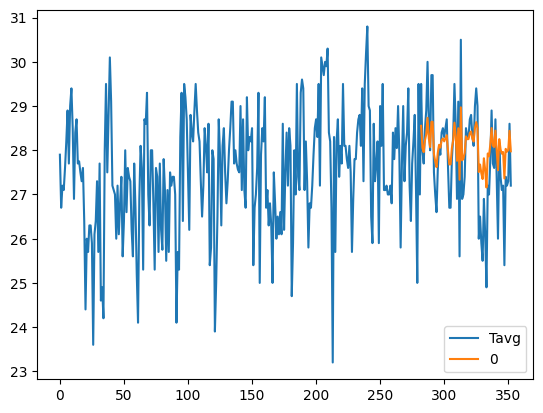

In [678]:
kan.plot()

In [679]:
new_data = [[354, 27.2],[355,27.2],[356,27.2],[357,27.2],[358,27.2],[359,27.2],[360,27.2]]
lr.predict(new_data)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([27.98148701, 27.98420293, 27.98691886, 27.98963479, 27.99235071,
       27.99506664, 27.99778257])

In [681]:
kan.to_json('Prediksi Sulawesi Utara.json')